In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("../Datasets/housing.csv")

In [3]:
housing["income_cat"] = pd.cut(housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

In [6]:
strat_train_set = strat_train_set.drop("income_cat", axis=1)
strat_test_set = strat_test_set.drop("income_cat", axis=1)

In [7]:
housing = strat_train_set.copy()

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [10]:
housing_num = housing.select_dtypes(include=[np.number])

In [11]:
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [12]:
X = imputer.transform(housing_num)

In [13]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [15]:
housing_cat = housing[["ocean_proximity"]]

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [19]:
housing_cat_1hot = pd.DataFrame(housing_cat_1hot.toarray(), columns=encoder.get_feature_names_out().tolist(), index=housing_cat.index)

In [21]:
housing_prepro = pd.concat([housing_tr, housing_cat_1hot], axis=1)

In [31]:
housing_test = housing_prepro.copy()

<Axes: >

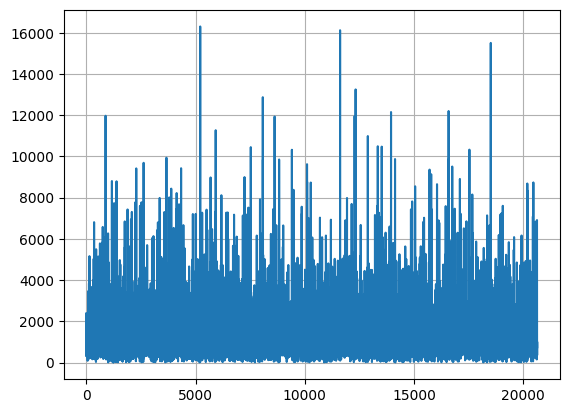

In [32]:
housing_test["population"].sort_index().plot(grid=True)

In [33]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing_test["population"])